In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
#If you want the Keras modules you write to be compatible with both 
#Theano (th) and TensorFlow (tf), you have to write them via the abstract Keras backend API.
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
import math
image_path="data"
IMG_SIZE=100

#https://keras.io/preprocessing/image/#imagedatagenerator-class
data_generator=ImageDataGenerator(validation_split=0.2)

train_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='training')
valid_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='validation')

STEP_SIZE = train_data.n//train_data.batch_size
VALIDATION_STEPS = math.ceil(valid_data.n / valid_data.batch_size)

print("Classes : ",train_data.class_indices)
print("VALIDATION_STEPS : ",VALIDATION_STEPS)

Found 22 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Classes :  {'False_Images': 0, 'Processed_Images': 1}
VALIDATION_STEPS :  1


In [3]:
base_model=InceptionV3(include_top=False, weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x)
#x=Dropput(0.2)(x)
x=Dense(512,activation='relu')(x)
#final layer with softmax activation
preds=Dense(2,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)
model.summary()

W0912 14:23:09.265716 11596 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 14:23:09.279729 11596 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 14:23:09.283732 11596 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0912 14:23:09.302749 11596 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0912 14:23:09.303750 11

In [4]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
#for layer in model.layers[:5]:
    #layer.trainable=False
#for layer in model.layers[5:]:
    #layer.trainable=True

#len(model.layers)

315

In [5]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(generator=train_data,
                            steps_per_epoch=STEP_SIZE,
                            validation_data=valid_data,
                            validation_steps=VALIDATION_STEPS,
                            epochs=15)
print(history.history.keys())

W0912 14:23:21.662981 11596 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0912 14:23:21.811115 11596 deprecation.py:323] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
2/2 [==============================] - 15s 8s/step - loss: 0.6923 - acc: 0.7500 - val_loss: 3.2258 - val_acc: 0.8000
Epoch 2/15
2/2 [==============================] - 1s 487ms/step - loss: 0.6532 - acc: 0.8167 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 3/15
2/2 [==============================] - 0s 87ms/step - loss: 0.3183 - acc: 0.8056 - val_loss: 1.3870 - val_acc: 0.8000
Epoch 4/15
2/2 [==============================] - 0s 90ms/step - loss: 0.4864 - acc: 0.9500 - val_loss: 1.1989 - val_acc: 0.8000
Epoch 5/15
2/2 [==============================] - 0s 88ms/step - loss: 1.4617 - acc: 0.8056 - val_loss: 0.7252 - val_acc: 0.8000
Epoch 6/15
2/2 [==============================] - 0s 88ms/step - loss: 0.0941 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 1.0000
Epoch 7/15
2/2 [==============================] - 0s 91ms/step - loss: 0.3978 - acc: 0.9000 - val_loss: 0.0592 - val_acc: 1.0000
Epoch 8/15
2/2 [==============================] - 0s 87ms/step - loss: 0.1101 - acc: 0.9389 - val

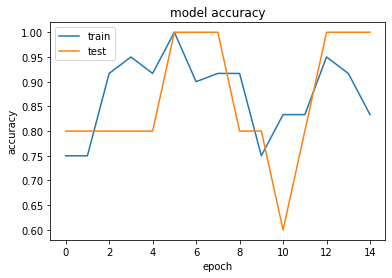

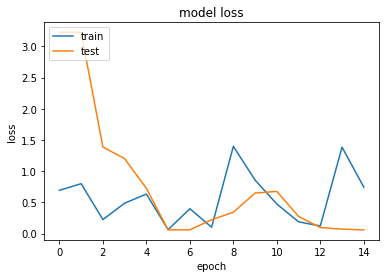

In [9]:
#Plotting graphs for better viewing the model
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
#This will plot the model and save it as a png image for later viewing
#from keras.utils import plot_model
#plot_model(model, to_file='InceptionV3.png')